
# Progetto Analysis of Algorithms and Data Structures - 2022/2023

## Enumerazione di linguaggi che contengono o non contengono un pattern

#### Autore: Alberto Biliotti - 7109894 - <a href=\mailto:alberto.biliotti@stud.unifi.it\>alberto.biliotti@stud.unifi.it</a>

### Trovare il polinomio di autocorrelazione
Per poter enumerare i linguaggi che contengono o meno un determinato pattern, sfruttando la relativa funzione generatrice, è necessario in primo luogo definire un metodo per trovare il polinomio di autocorrelazione di una stringa.

Per fare ciò è stato implementato un algoritmo che simula il procedimento per trovare il vettore di autocorrelazione $C(t)$ con la tabella visto a lezione, che confronta a ogni passo il suffisso della stringa con il prefisso ottenuto spostando il pattern di una posizione verso destra nella coda:


| Pattern|Coda|C(t)|
|----------:| | |
| a a b b a a| | |
|  a a b b a a | |1|
| a a b b a |a|0|
| a a b b |a b|0|
| a a b |b a a|0|
| a a| b b a a|1|
| a |a b b a a|1|

Il polinomio risultante sarà quindi: $$ C(t)=1+t^4+t^5 $$

In [3]:
from sympy import *
from sympy.abc import *

t=symbols('t')

def polinomioAutoCorrelazione(stringa):
    #il primo termine del polinomio è sempre uno e per questo parto da una funzione che contiene solo uno
    def f(t1):
        return 1
    func=f(t)
    for i in range(len(stringa)-1): #ad ogni iterazione i confronto i primi n-i-1 caratteri della stringa (con n lunghezza della stringa) con gli ultimi n-i-1, se sono uguali aggiungo il termine t^i+1 al polinomio di autocorrelazione
        if stringa[i+1:]==stringa[:-(i+1)]:
            func= func + t ** (i+1) #se corrispondono aggiungo al polinomio il termine i+1-esimo
    return func

Verifichiamo quindi se i polinomi coincidono:

In [4]:
polinomioAutoCorrelazione("aabbaa") #trovo il polinomio di autocorrelazione della stringa aabbaa

t**5 + t**4 + 1

### Trovare la funzione generatrice delle parole di un alfabeto che evitano o che contengono un pattern
Per trovare la funzione generatrice delle parole di un alfabeto che evitano o che contengono un determinato pattern di lunghezza k su un alfabeto $A$ di cardinalità m è sufficiente sfruttare le due formule:
$$ S(t)= {C(t) \over t^k+(1-mt)C(t))}$$ Dove S(t) è la funzione generatrice delle parole dell'alfabeto che **non contengono**
il pattern oltre a:
$$ L(t)= {t^k \over (1-mt)(t^k+(1-mt)C(t))}$$ Dove L(t) è la funzione generatrice delle parole dell'alfabeto che **contengono**
il pattern.


In [5]:
def avoidpattern(pattern, m): #metodo che restituisce la funzione generatrice delle parole dell'alfabeto di cardinalità m che non contengono il pattern passato in input
    func=polinomioAutoCorrelazione(pattern) #trovo il polinomio di autocorrelazione del pattern
    k=len(pattern)
    avoidfunc=func/(t**k+(1-m*t)*func)
    return avoidfunc

def containpattern(pattern, m): #metodo che restituisce la funzione generatrice delle parole dell'alfabeto di cardinalità m che contengono il pattern passato in input
    func=polinomioAutoCorrelazione(pattern) #trovo il polinomio di autocorrelazione del pattern
    k=len(pattern)
    containfunc=t**k/((1-m*t)*(t**k+(1-m*t)*func))
    return containfunc

Testiamo ora la nostra implementazione sullo stesso pattern visto in precedenza considerando un alfabeto binario composto da {${a,b}$}

In [6]:
f=avoidpattern("aabbaa",2) #trovo la funzione generatrice delle parole dell'alfabeto binario {0,1} che non contengono il pattern 0010

In [94]:
f

(t**5 + t**4 + 1)/(t**6 + (1 - 2*t)*(t**5 + t**4 + 1))

Sviluppiamo in serie la funzione generatrice trovata in precedenza per verificarne la correttezza, in particolare osserviamo come il coefficiente associato al termine di grado i corrisponda al numero di parole di lunghezza i che non contengono il pattern

In [95]:
series(f,t,n=11)

1 + 2*t + 4*t**2 + 8*t**3 + 16*t**4 + 32*t**5 + 63*t**6 + 124*t**7 + 244*t**8 + 480*t**9 + 945*t**10 + O(t**11)

Rieseguiamo il procedimento svolto in precedenza, questa volta però enumerando le parole che **contengono** il pattern

In [96]:
f1=containpattern("aabbaa",2) #trovo la funzione generatrice delle parole dell'alfabeto binario {0,1} che contengono il pattern 0010

In [97]:
f1

t**6/((1 - 2*t)*(t**6 + (1 - 2*t)*(t**5 + t**4 + 1)))

Come prima sviluppo in serie la funzione generatrice trovata in precedenza per verificarne la correttezza, in particolare osserviamo che sommando i coefficienti associati ai termini t elevati alla stessa potenza n dei due sviluppi otterremo che il risultato sarà pari a 2^n, ossia il numero di possibili disposizioni con ripetizioni di {$a,b$} di lunghezza n, ossia tutte le parole di lunghezza n che è possibile generare con un alfabeto di cardinalità 2

In [98]:
series(f1,t,n=11)

t**6 + 4*t**7 + 12*t**8 + 32*t**9 + 79*t**10 + O(t**11)

### Verifica dei risultati tramite simulazione
Ora vogliamo verificare la correttezza dei risultati ottenuti in precedenza, per fare ciò per prima cosa definiamo due metodi che contano rispettivamente il numero di stringhe contenenti o meno un determinato pattern, per fare ciò genero una lista contenente tutte le parole possibili di lunghezza desiderata con l'alfabeto passato in ingresso e successivamente creo un'altra lista in cui inserisco 1 se la parola nella stessa posizione della lista contiene o meno il pattern e sommo tutti gli elementi del vettore, ottenendo così il numero totale di parole di lunghezza desiderata che contengono (o che non contengono) un determinato pattern dato un alfabeto.

In [25]:
import itertools

def contaStringheConPattern(pattern, alfabeto, lungpar):
    paroletot=[''.join(i) for i in itertools.product(alfabeto, repeat = lungpar)]
    count = sum([1 for parola in paroletot if pattern in parola])
    return count

def contaStringheSenzaPattern(pattern, alfabeto, lungpar):
    paroletot=[''.join(i) for i in itertools.product(alfabeto, repeat = lungpar)]
    count = sum([1 for parola in paroletot if pattern not in parola])
    return count

Verifichiamo quindi se i risultati così ottenuti coincidono con quelli ottenuti in precedenza sviluppando in serie la funzione generatrice

In [68]:
contaStringheSenzaPattern('aabbaa','ab',10)

945

Ed effettivamente il coefficiente del termine di grado 10 dello sviluppo in serie della funzione generatrice corrisponde al valore sopra riportato di 945.

Verifico quindi se ciò vale anche per l'enumerazioni di linguaggi che contengono il pattern

In [73]:
contaStringheConPattern('aabbaa','ab',10)

79

E anche in questo caso possiamo osservare come i due valori corrispondano

### Approssimazione della proporzione del numero di parole che contengono o meno il pattern

Ora vogliamo invece approssimare il rapporto tra parole che contengono o meno un pattern e tutte le parole componibili con le lettere del nostro alfabeto. Ciò può risultare utile quando il numero di parole tra cui controllare cresce in maniera eccessiva, il che può capitare quando prendiamo in considerazione un alfabeto che non è più binario ma, ad esempio, composto da tutte le lettere minuscole dell'alfabeto inglese, è composto da 26 caratteri

Per prima cosa creiamo quindi un metodo che, dati un alfabeto e la lunghezza della parola, restituisca una parola casuale della lunghezza desiserata e composta dai caratteri dell'alfabeto in input.
Per fare ciò abbiamo sfruttato il metodo *choices* della libreria *random* che restituisce una lista di caratteri di lunghezza desiderata generata scegliendo casualmente un carattere dall'alfabeto in ingresso.

In [16]:
import random
def generaParolaCasuale(alfabeto,lunghezza):
    return''.join(random.choices(alfabeto, k=lunghezza))

Generiamo casualmente una parola utilizzando le lettere minuscole dell'alfabeto inglese, contenute nella libreria *string* di Python:

In [46]:
generaParolaCasuale(string.ascii_lowercase,5)

'oatoj'

Ora definiamo due metodi che approssimino i rapporti desiderati, passando in ingresso il pattern in analisi, l'alfabeto di partenza, la lunghezza delle parole da analizzare ed il numero di parole desiderato per approssimare la proporzione. Per fare ciò sfruttiamo la parola chiave *(not) in* che restituisce il valore booleano *True* se il pattern in analisi è contenuto o meno all'interno di una stringa. Inoltre una volta contate tutte le parole contenenti il pattern il valore ottenuto viene diviso per il numero di parole generate per approssimare così la proporzione di parole contenenti il pattern

In [10]:
def approssimaRapportoParoleConPattern(pattern, alfabeto, lungpar, numit):
    count=0
    for i in range(1, numit):
        par=generaParolaCasuale(alfabeto,lungpar)
        if pattern in par:
            count=count+1
    return count/numit

def approssimaRapportoParoleSenzaPattern(pattern, alfabeto, lungpar, numit):
    count=0
    for i in range(1, numit):
        par=generaParolaCasuale(alfabeto,lungpar)
        if pattern not in par:
            count=count+1
    return count/numit

Verifichiamo ora, sempre con lo stesso pattern e alfabeto usati in precedenza, se tali metodi approssimano in maniera soddisfacente le proporzioni tra numero di parole che contengono o meno il pattern.
Conosciamo, dagli esempi precedenti, che la proporzione di parole dell'alfabeto binario di lunghezza 10 sull'alfabeto binario {$a,b$} contenenti il pattern *aabbaa* su tutte le parole di lunghezza 10 sullo stesso alfabeto è di $79 \over 1024$$=0.077$ con 1024 che non è altro che 2 elevato alla 10, mentre la proporzione di parole che ***non*** contengono il patterm è uguale a circa $1-0.077=0.923$.
 Andando a eseguire il metodo per approssimare il raporto delle parole contenenti il pattern otteniamo:

In [74]:
parcon=approssimaRapportoParoleConPattern('aabbaa', 'ab', 10, 500)
parcon

0.074

Notiamo come la nostra approssimazione non si discosti molto dal valore reale, con un errore di appena $0.003$.
Andando invece ad approssimare la proporzione di parole che ***non*** contengono il pattern otteniamo:

In [80]:
parsenz=approssimaRapportoParoleSenzaPattern('aabbaa', 'ab', 10, 500)
parsenz

0.93

Che si discosta di appena 0.007 dal valore reale, con circa la metà delle parole generate rispetto alle 1024 possibili.
(ovviamente rieseguendo più volte lo script il valore dovrebbe variare leggermente, in quanto le parole da analizzare sono generate in maniera casuale)

### Grafici dei risultati delle simulazioni con lo stesso pattern al variare della lunghezza delle parole in esame
Sfruttiamo ora i due metodi appena definiti per riportare su un grafico l'approssimazione della proporzione di parole che contengono o meno un determinato pattern, sfruttando la libreria *matplotlib* di Python che permette di rappresentare in un  grafico una qualsiasi lista di numeri.


Partiamo dal solito esempio con il pattern ***aabbaa*** e alfabeto {$a,b$} e troviamo un'approssimazione della proporzione di parole di lunghezza fino a 50 lettere che contengono o meno il pattern, generando casualmente un campione di 10000 parole per ciascuna lunghezza della parola.
Tale procedimento è molto più veloce rispetto a dover calcolare direttamente il numero di parole che contengono o meno il pattern, in quanto per calcolare il numero esatto di parole di lunghezza 50 sull'alfabeto binario che contengono il pattern dovrei analizzare circa $10^{15}$ parole.

In [102]:
import matplotlib.pyplot as plt
listavalsenzapattern=[approssimaRapportoParoleSenzaPattern('aabbaa', 'ab', i,10000) for i in range(0,50)]
listavalconpattern=[approssimaRapportoParoleConPattern('aabbaa', 'ab', i,10000) for i in range(0,50)]

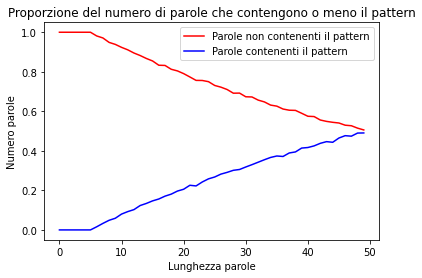

In [111]:
plt.plot(listavalsenzapattern, color='r', label='Parole non contenenti il pattern')
plt.plot(listavalconpattern, color='b', label='Parole contenenti il pattern')
plt.xlabel("Lunghezza parole")
plt.ylabel("Numero parole")
plt.title("Proporzione del numero di parole che contengono o meno il pattern")
plt.legend()
plt.show()

Notiamo, come atteso, che fino a che la lunghezza delle parole non supera le cinque lettere il pattern non è mai presente, in quanto tali parole sono più corte del pattern stesso e quindi non possono contenerlo al loro interno.
Possiamo inoltre osservare come, al netto di un leggero rumore, entrambi i grafici sembrino avere un andamento lineare fino ad arrivare a parole di 50 lettere di cui circa la metà contenenti il pattern in analisi.

Ora invece passiamo da un alfabeto binario all'alfabeto inglese, composto da 26 lettere, e in particolare cerchiamo di approssimare la proporzione di parole che contengono o non contengono la lettera a, sempre per parole contenenti fino a 50 lettere, ma questa volta con un campione di 50000 parole per ciascuna lunghezza in quanto il numero di parole generabili di lunghezza 50 avendo a disposizione tutte le lettere dell'alfabeto è dell'ordine di $10^{70}$, con ben 55 ordini di grandezza di differenza rispetto all'alfabeto binario.

In [107]:
listavalsenzaa=[approssimaRapportoParoleSenzaPattern('a', string.ascii_lowercase, i,50000) for i in range(0,50)]
listavalcona=[approssimaRapportoParoleConPattern('a', string.ascii_lowercase, i,50000) for i in range(0,50)]

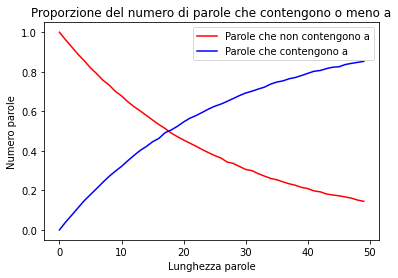

In [108]:
plt.plot(listavalsenzaa, color='r', label='Parole che non contengono a')
plt.plot(listavalcona, color='b', label='Parole che contengono a')
plt.xlabel("Lunghezza parole")
plt.ylabel("Numero parole")
plt.title("Proporzione del numero di parole che contengono o meno a")
plt.legend()
plt.show()

Notiamo come i grafici intersechino quando abbiamo parole di lunghezza pari a circa 18 lettere, inoltre il grafico delle parole contenenti a sembra avere un andamento logaritmico, anche se ovviamente il valore massimo raggiungibile è 1 essendo una proporzione

Mantenendo come alfabeto quello inglese, approssimiamo questa volta la proporzione di parole contenenti il pattern "re", testando sempre 50000 parole per ogni lunghezza fino a 50 lettere:

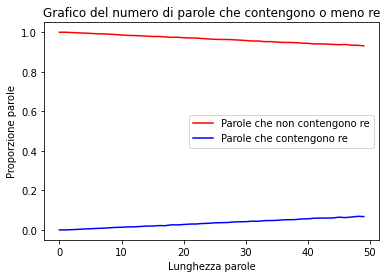

In [114]:
listavalsenzare = [approssimaRapportoParoleSenzaPattern('re', string.ascii_lowercase, i, 50000) for i in range(0, 50)]
listavalconre = [approssimaRapportoParoleConPattern('re', string.ascii_lowercase, i, 50000) for i in range(0, 50)]
plt.plot(listavalsenzare, color='r', label='Parole che non contengono re')
plt.plot(listavalconre, color='b', label='Parole che contengono re')
plt.xlabel("Lunghezza parole")
plt.ylabel("Proporzione parole")
plt.title("Grafico del numero di parole che contengono o meno re")
plt.legend()
plt.show()

Notiamo come, analizzando un pattern più lungo rispetto al caso precedente, il numero di parole che non contiene il pattern risulti essere nettamente maggiore rispetto a quello delle parole che invece lo contengono.

Infine, come ultimo esempio, analizziamo il pattern ***0010*** con alfabeto binario {$0,1$}, testando ogni possibile lunghezza con 10000 parole.

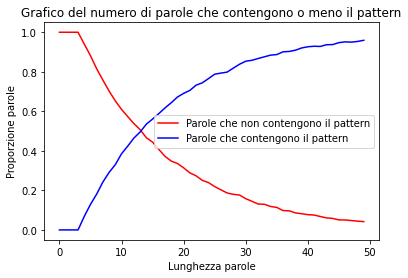

In [117]:
listavalsenzapat = [approssimaRapportoParoleSenzaPattern('0010', '01', i, 10000) for i in range(0, 50)]
listavalconpat = [approssimaRapportoParoleConPattern('0010', '01', i, 10000) for i in range(0, 50)]
plt.plot(listavalsenzapat, color='r', label='Parole che non contengono il pattern')
plt.plot(listavalconpat, color='b', label='Parole che contengono il pattern')
plt.xlabel("Lunghezza parole")
plt.ylabel("Proporzione parole")
plt.title("Grafico del numero di parole che contengono o meno il pattern")
plt.legend()
plt.show()

Notiamo come in quest'ultimo caso i due grafici si intersechino quando la lunghezza delle parole è di circa 14 lettere, cosa che possiamo dimostrare anche sfruttando lo sviluppo in serie delle funzioni generatrici con i metodi visti in precedenza:

In [142]:
avoidpattern('0010',2)

(t**3 + 1)/(t**4 + (1 - 2*t)*(t**3 + 1))

In [143]:
series(_,t,n=15)

1 + 2*t + 4*t**2 + 8*t**3 + 15*t**4 + 28*t**5 + 52*t**6 + 97*t**7 + 181*t**8 + 338*t**9 + 631*t**10 + 1178*t**11 + 2199*t**12 + 4105*t**13 + 7663*t**14 + O(t**15)

In [144]:
containpattern('0010',2)

t**4/((1 - 2*t)*(t**4 + (1 - 2*t)*(t**3 + 1)))

In [145]:
series(_,t,n=15)

t**4 + 4*t**5 + 12*t**6 + 31*t**7 + 75*t**8 + 174*t**9 + 393*t**10 + 870*t**11 + 1897*t**12 + 4087*t**13 + 8721*t**14 + O(t**15)

Notiamo come il numero di parole di lunghezza 14 contenente il pattern sia effettivamente maggiore rispetto alle parole della stessa lunghezza che non contengono tale pattern.
Questo dimostra la validità dell'approssimazione che però non è comunque priva di un margine di errore visibile anche dalle irregolarità della curva.